<a href="https://colab.research.google.com/github/Azevedo1996/Compra_venda_acoes_bandas_Bollinge/blob/main/Compra_e_venda_de_acoes_utilizando_bandas_de_Bollinger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 59.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [3]:
# Importando bibliotecas
import yfinance as yf
import pandas as pd
import numpy as np

In [4]:
# Selecionando a ação que queremos trabalhar
acao = yf.Ticker('ITUB4.SA')
data = acao.history(period='1y')
df = data[['Close']]

In [5]:
df

,Close
Date,
2022-02-17 00:00:00-03:00,25.038166
2022-02-18 00:00:00-03:00,25.134212
2022-02-21 00:00:00-03:00,24.519543
2022-02-22 00:00:00-03:00,24.744072
2022-02-23 00:00:00-03:00,24.398140
...,...
2023-02-13 00:00:00-03:00,26.709999
2023-02-14 00:00:00-03:00,26.379999
2023-02-15 00:00:00-03:00,26.770000


In [9]:
# Calculando media movél
mm = df.rolling(window=20).mean()
mm

,Close
Date,
2022-02-17 00:00:00-03:00,NaN
2022-02-18 00:00:00-03:00,NaN
2022-02-21 00:00:00-03:00,NaN
2022-02-22 00:00:00-03:00,NaN
2022-02-23 00:00:00-03:00,NaN
...,...
2023-02-13 00:00:00-03:00,25.613159
2023-02-14 00:00:00-03:00,25.628069
2023-02-15 00:00:00-03:00,25.638994


In [10]:
# Calculando desvio padrão
dpm = df.rolling(window=20).std()
dpm

,Close
Date,
2022-02-17 00:00:00-03:00,NaN
2022-02-18 00:00:00-03:00,NaN
2022-02-21 00:00:00-03:00,NaN
2022-02-22 00:00:00-03:00,NaN
2022-02-23 00:00:00-03:00,NaN
...,...
2023-02-13 00:00:00-03:00,0.642412
2023-02-14 00:00:00-03:00,0.657152
2023-02-15 00:00:00-03:00,0.674890


In [11]:
# Calculo da banda superior e inferior
sup_band = mm + 2 * dpm
inf_band = mm - 2 * dpm

A Teoria de Bollinger fala que se o valor ultrapassar a banda superior é uma estimativa de venda pois encontra-se longe da media movel.</br>
Da mesma forma que se o valor ultrapassar o limite inferior é uma indicação de compra pois o valor esta abaixo da media movel.</br>
</br>
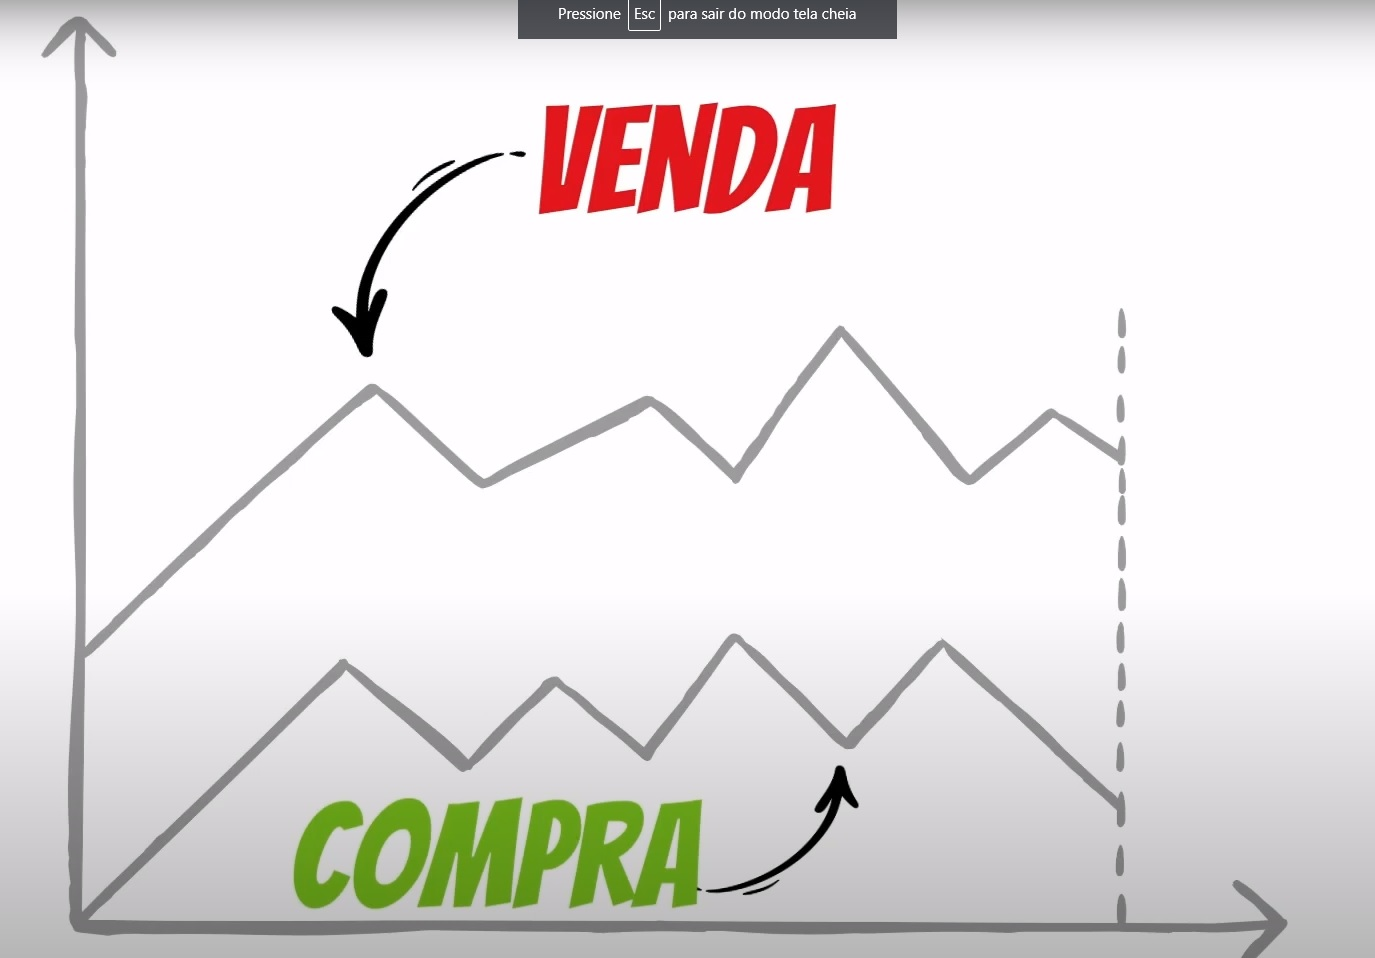

In [12]:
# Alterar nome das colunas das bandas sup e inf
sup_band = sup_band.rename(columns = {'Close' : 'Superior'})
inf_band = inf_band.rename(columns = {'Close' : 'Inferior'})

In [13]:
# unindo as colunas
bandas_bollinger = df.join(sup_band).join(inf_band)

In [14]:
bandas_bollinger

,Close,Superior,Inferior
Date,,,
2022-02-17 00:00:00-03:00,25.038166,NaN,NaN
2022-02-18 00:00:00-03:00,25.134212,NaN,NaN
2022-02-21 00:00:00-03:00,24.519543,NaN,NaN
2022-02-22 00:00:00-03:00,24.744072,NaN,NaN
2022-02-23 00:00:00-03:00,24.398140,NaN,NaN
...,...,...,...
2023-02-13 00:00:00-03:00,26.709999,26.897983,24.328335
2023-02-14 00:00:00-03:00,26.379999,26.942373,24.313764
2023-02-15 00:00:00-03:00,26.770000,26.988774,24.289215


In [15]:
# Limpando dados / retirando nulos
bandas_bollinger.dropna(inplace=True)

In [17]:
# Calculo de pontos de compra e venda
compra = bandas_bollinger[bandas_bollinger["Close"] <= bandas_bollinger['Inferior']]
venda = bandas_bollinger[bandas_bollinger["Close"] <= bandas_bollinger['Superior']]

In [18]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
